# TensorFlow 2.0 alpha - Transfer Learning with Pretrained ConvNets
## Cats vs. Dogs Dataset - Classify Images

#### This process should allow for higher accuracies than training a model from scratch. A *pretrained model* is a saved network previously trained on a large dataset. This model can be used as is, or *transfer learning* can utilize some *pretrained convnets*. *Transfer learning* means there is no need to train a new large model. 2 scenarios of *transfer learning*:
#### (1) Feature Extraction - use representations learned from previous training, for extracting meaningful features from new samples - Use Only the convnets (Convolutional Base) - do Not use the classification part of the pretrained model (will need to Add New Classifier)
#### (2) Fine-Tuning - process of unfreezing model base top layers for feature extraction, and Jointly training both the new classifier layers and frozen model last layers - leads to fine-tuning of higher order feature representation and final classifier, making model more relevant to specific task at hand

In [14]:
from __future__ import absolute_import, division, print_function

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

keras = tf.keras

## Preprocess the Data
#### Download the data using Tensorflow Datasets - tfds

In [18]:
!pip install tensorflow-datasets
import tensorflow_datasets as tfds

# split data into 80% Train, 10% Test, 10% Validation

SPLIT_WEIGHTS = (8, 1, 1)
splits = tfds.Split.TRAIN.subsplit(weighted=SPLIT_WEIGHTS)

(raw_train, raw_validation, raw_test), metadata = tfds.load('cats_vs_dogs',
                                                           split=list(splits),
                                                           with_info=True,
                                                           as_supervised=True)

    100% |████████████████████████████████| 409kB 3.6MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 5.7MB/s ta 0:00:011
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /Users/MPHA/Library/Caches/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
  Running setup.py bdist_wheel for promise ... done
  Stored in directory: /Users/MPHA/Library/Caches/pip/wheels/92/84/9f/75e2235effae0e1c5a5c0626a503e532bbffcb7e79e672b606
  Running setup.py bdist_wheel for googleapis-common-protos ... done
  Stored in directory: /Users/MPHA/Library/Caches/pip/wheels/b8/16/23/0a02129b4da233fbc8d08d39317367f6b9708d62f3eb641649
Successfully built future promise googleapis-common-protos
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   8%|▊         | 61/786 [01:07<14:36,  1.21s/ MiB]


Dl Completed...:   0%|          | 0/1 [02:11<?, ? url/s]s/ MiB]


Dl Completed...:   0%|          | 0/1 [03:42<?, ? url/s]s/ MiB]


Dl Completed...:   0%|          | 0/1 [04:29<?, ? url/s] MiB/s]


Dl Completed...:   0%|          | 0/1 [05:25<?, ? url/s] MiB/s]


Dl Completed...:   0%|          | 0/1 [06:28<?, ? url/s] MiB/s]


Dl Completed...:   0%|          | 0/1 [06:42<?, ? url/s] MiB/s]


Dl Completed...:   0%|          | 0/1 [06:59<?, ? url/s] MiB/s]


Dl Completed...:   0%|          | 0/1 [08:20<?, ? url/s]s/ MiB]


Dl Completed...:   0%|          | 0/1 [09:47<?, ? url/s]s/ MiB]


Dl Completed...:   0%|          | 0/1 [11:11<?, ? url/s]s/ MiB]


Dl Completed...:   0%|          | 0/1 [12:42<?, ? url/s]s/ MiB]


Dl Size...: 100%|██████████| 786/786 [13:58<00:00,  1.62s/ MiB]

0 examples [00:00, ? examples/s]

23229 examples [00:45, 514.95 examples/s]WARNING: Logging before flag parsing goes to stderr.
W0404 20:19:31.281774 140736985473984 cats_vs_dogs.py:107] 1738 images were corrupted and were skipped
23262 examples [00:45, 514.61 examples/s]
Shuffling...:   0%|          | 0/20 [00:00<?, ? shard/s]W0404 20:19:31.755728 140736985473984 deprecation.py:323] From /anaconda3/lib/python3.6/site-packages/tensorflow_datasets/core/file_format_adapter.py:249: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`

Reading...: 0 examples [00:00, ? examples/s]
Reading...: 580 examples [00:00, 4479.49 examples/s]
Reading...: 1164 examples [00:00, 5490.48 examples/s]
Shuffling...:   5%|▌         | 1/20 [00:01<00:20,  1.09s/ shard]mples/s]
Reading...: 0 examples [00:00, ? examples/s]
Reading...: 596 examples [00:00, 5784.43 examples/s]
Reading...: 1164 examples

Shuffling...:  50%|█████     | 10/20 [00:09<00:09,  1.00 shard/s]ples/s]
Reading...: 0 examples [00:00, ? examples/s]
Reading...: 867 examples [00:00, 8548.70 examples/s]
Reading...: 1163 examples [00:00, 9462.54 examples/s]
Shuffling...:  55%|█████▌    | 11/20 [00:11<00:09,  1.00s/ shard]ples/s]
Reading...: 0 examples [00:00, ? examples/s]
Reading...: 784 examples [00:00, 7784.26 examples/s]
Reading...: 1163 examples [00:00, 8792.61 examples/s]
Shuffling...:  60%|██████    | 12/20 [00:12<00:08,  1.00s/ shard]ples/s]
Reading...: 0 examples [00:00, ? examples/s]
Reading...: 851 examples [00:00, 8335.03 examples/s]
Reading...: 1163 examples [00:00, 8863.78 examples/s]
Shuffling...:  65%|██████▌   | 13/20 [00:12<00:06,  1.01 shard/s]ples/s]
Reading...: 0 examples [00:00, ? examples/s]
Reading...: 1163 examples [00:00, 11952.25 examples/s]
Shuffling...:  70%|███████   | 14/20 [00:13<00:05,  1.01 shard/s]ples/s]
Reading...: 0 examples [00:00, ? examples/s]
Reading...: 509 examples [00:00, 4

Shuffling...: 100%|██████████| 20/20 [00:20<00:00,  1.02s/ shard]ples/s]


#### Resulting tf.data.Dataset Objects contain (image, label) pairs 
#### Images have variable shape and 3 channels - Lables are scalar

In [19]:
print(raw_train)

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


### Show first 2 images and labels - from Training set

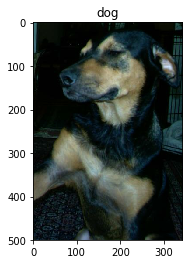

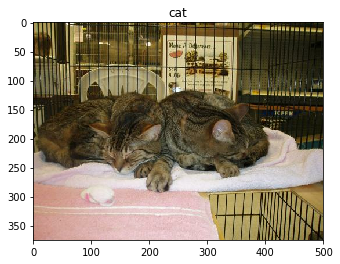

In [21]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

## Format the Data
### tf.image - Format images for task - Resize images to fixed input size - Rescale image input channels to range of [-1, 1]

In [22]:
# Images resized to 160x160

IMG_SIZE = 160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    
    return image, label

### map method - Apply the function to each item in dataset

In [23]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

### Shuffle and Batch the data

In [24]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [26]:
# Inspect a Batch of data

for image_batch, label_batch in train_batches.take(1):
    pass

image_batch.shape

TensorShape([32, 160, 160, 3])

# Create Base Model for Feature Extraction
#### The base model is from the MobileNet V2 model (developed at Google) 
#### Model was pretrained on the ImageNet dataset (1.4 M images, 1000 classes)

#### Apply this model to the cat vs. dog problem - Pick a layer from MobileNet V2 for Feature Extraction -   Common Practice is using Output of Last Layer Before Flattening (BOTTLENECK Layer) - *post-flattening layers are too specialized to the task the pretrained network was trained on*

### Instantiate MobileNet V2 model (pre-loaded with weights trained on ImageNet)

In [27]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# include_top=False loads a network Without the Classifications layers at the top

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False,
                                              weights='imagenet')

9412608/9406464 [==============================] - 21s 2us/step


#### This Feature Extractor converts each 160x160x3 image - to a 5x5x1280 block of features

In [29]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


#### Feature Extraction involves Freezing the Convolutional Base created above - using it as an Extractor 
#### Important to freeze base before you compile and train model - prevent weights in these layers from updating during training

### Freeze the Convolutional Base

In [30]:
# code used setting layer.trainable=False

base_model.trainable=False

# look at base model architecture

base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalizationV1) (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

### Add Classification Head
#### To generate predictions from features block, average over the 5x5 spatial locations - use a Pooling layer
#### Convert features to a single 1280-element vector per image

In [32]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

print(feature_batch_average.shape)

(32, 1280)


#### Apply a Dense layer - to convert these features to a single prediction per image
#### NO activation function here - prediction treated as *logit*: positive numbers predict 1, negative predict 0

In [33]:
prediction_layer = keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)

print(prediction_batch.shape)

(32, 1)


#### Stack Feature Extractor and these 2 layers - use a Sequential model

In [34]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

# Compile the Model

In [35]:
# compile, prior to training

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


#### The 1,281 trainable parameters are divided among 2 tf.variable Objects - Weights and Biases of the 2 Dense layers

In [36]:
len(model.trainable_variables)

2

# Train the Model

In [37]:
num_train, num_val, num_test = (
    metadata.splits['train'].num_examples*weight/10
    for weight in SPLIT_WEIGHTS
)

initial_epochs = 10
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = 20

loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 21s 1s/step - loss: 3.3720 - accuracy: 0.6281


In [38]:
print('Initial loss: {:.2f}'.format(loss0))
print('Initial accuracy: {:.2f}'.format(accuracy0))

Initial loss: 3.37
Initial accuracy: 0.63


In [39]:
history = model.fit(train_batches.repeat(),
                   epochs = initial_epochs,
                   steps_per_epoch = steps_per_epoch,
                   validation_data = validation_batches.repeat(),
                   validation_steps = validation_steps)

Epoch 1/10
581/581 [==============================] - 766s 1s/step - loss: 2.4486 - accuracy: 0.7007 - val_loss: 1.0707 - val_accuracy: 0.8609
Epoch 2/10
581/581 [==============================] - 771s 1s/step - loss: 1.1857 - accuracy: 0.8424 - val_loss: 0.7133 - val_accuracy: 0.9094
Epoch 3/10
581/581 [==============================] - 729s 1s/step - loss: 0.8742 - accuracy: 0.8830 - val_loss: 0.5401 - val_accuracy: 0.9312
Epoch 4/10
581/581 [==============================] - 754s 1s/step - loss: 0.7312 - accuracy: 0.9049 - val_loss: 0.4743 - val_accuracy: 0.9344
Epoch 5/10
581/581 [==============================] - 743s 1s/step - loss: 0.6260 - accuracy: 0.9176 - val_loss: 0.4344 - val_accuracy: 0.9438
Epoch 6/10
581/581 [==============================] - 745s 1s/step - loss: 0.6070 - accuracy: 0.9203 - val_loss: 0.4277 - val_accuracy: 0.9500
Epoch 7/10
581/581 [==============================] - 752s 1s/step - loss: 0.5381 - accuracy: 0.9290 - val_loss: 0.4351 - val_accuracy: 0.9516

#### After 10 epochs - achieves accuracy around 95 %

## Learning Curves

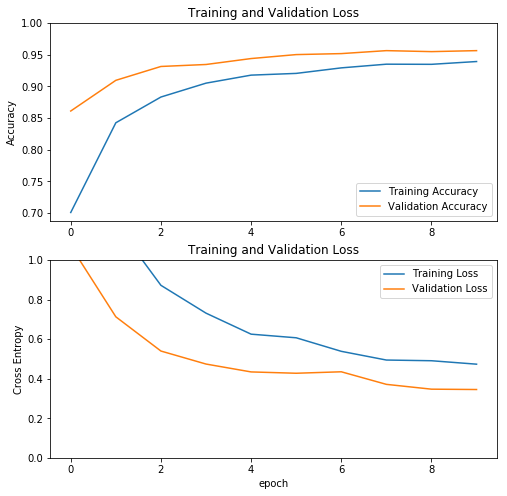

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Loss')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#### Validation Metrics are so much better than Training metrics - because of layers like tf.keras.layers.BatchNormalization, and tf.keras.layers.Dropout making training more difficult
#### Also training epochs average the metrics - Validation metrics are taken After the epoch

## Fine Tuning
#### Thus far, only the few layers were trained, on top of the MobileNetV2 Untrained layers - Another way to achieve better accuracy would be to now FINE TUNE the weights of the top Untrained layers alongside the training of the top-level Classifier - Fine Tuning GOAL is to adapt specialized features to new dataset (higher up the layer, the more specialized to data it was trained on)
#### This should only be attempted AFTER training the top-level classifier with the pre-trained model set to non-trainable - If you atempt to train All layers jointly the Gradient updates will be too large (pretrained model forgets everything it just learned)

## Un-Freeze Top Layers of Base Model

In [41]:
# Freeze top - set bottom to UNtrainable - Then Recompile, and resume training

base_model.trainable = True

# How many layers in base model?

print('Number of layers in base model: ', len(base_model.layers))

Number of layers in base model:  155


In [42]:
# Fine Tune from this layer, onwards

fine_tune_at = 100

# Freeze all layers Before above layer

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

## Compile the Model

In [43]:
# Compile - using a Lower training rate

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [44]:
len(model.trainable_variables)

58

## Continue to Train the Model

In [47]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches.repeat(),
                        steps_per_epoch = steps_per_epoch,
                        epochs=total_epochs,
                        initial_epoch = initial_epochs,
                        validation_data = validation_batches.repeat(),
                        validation_steps = validation_steps)

Epoch 11/20
581/581 [==============================] - 1134s 2s/step - loss: 0.4094 - accuracy: 0.9478 - val_loss: 0.2813 - val_accuracy: 0.9594
Epoch 12/20
581/581 [==============================] - 1083s 2s/step - loss: 0.3494 - accuracy: 0.9568 - val_loss: 0.2217 - val_accuracy: 0.9688
Epoch 13/20
581/581 [==============================] - 1084s 2s/step - loss: 0.2929 - accuracy: 0.9658 - val_loss: 0.2005 - val_accuracy: 0.9719
Epoch 14/20
581/581 [==============================] - 1054s 2s/step - loss: 0.2842 - accuracy: 0.9661 - val_loss: 0.1614 - val_accuracy: 0.9766
Epoch 15/20
581/581 [==============================] - 1075s 2s/step - loss: 0.2159 - accuracy: 0.9740 - val_loss: 0.1976 - val_accuracy: 0.9781
Epoch 16/20
581/581 [==============================] - 1104s 2s/step - loss: 0.2073 - accuracy: 0.9743 - val_loss: 0.2093 - val_accuracy: 0.9797
Epoch 17/20
581/581 [==============================] - 1080s 2s/step - loss: 0.1840 - accuracy: 0.9768 - val_loss: 0.1957 - val_ac

# Learning Curves

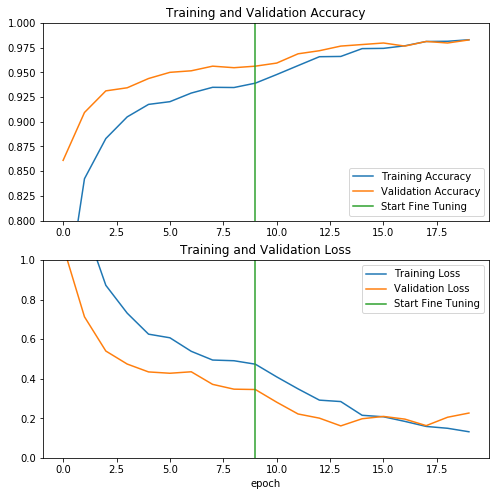

In [48]:
# Learning curves for the training and validation accuracy and loss, after Fine-tuning

acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1,)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1, initial_epochs-1],
        plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1, initial_epochs-1],
        plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# CONCLUSION
### This exercise (1) examined the data (2) built an input pipeline - using keras ImageDataGenerator (3) composed model-loaded pretrained model/weights-stacked classification layers on top (4) trained the model (5) evaluated model
### Feature Extraction - When using smaller datasets, common to leverage features from model trained on a larger set - instantiate a pretrained model and freeze it, training only the classifier you added
### Fine Tuning - Training the top layers of your pretrained model on the new data to further improve performance
### Training the model took some time (~13 min per epoch) - CNNs work faster on a gpu
### Training the model following Fine-Tuning took much more time (~ 25 min per epoch)

In [49]:
# support for this tutorial can be found on tensorflow.org - Permissions granted
#
#@title MIT License
#
# Copyright (c) 2017 François Chollet 